In [8]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
customer_data = pd.read_csv('C:\\Users\\Jacob Kai\\Documents\\Data Analysis\\Mall_Customers.csv')
customer_data

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
customer_data.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [7]:
customer_data.duplicated().sum()

0

In [24]:
X = customer_data[['Annual_Income_(k$)', 'Spending_Score']]
X

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Annual_Income_(k$)  200 non-null    int64
 1   Spending_Score      200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [33]:
type(X)

pandas.core.frame.DataFrame

In [1]:
H = X.iloc[:, [0, 1]].values
H

NameError: name 'X' is not defined

In [40]:
type(H)

numpy.ndarray

In [41]:
WCSS = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    kmeans.fit(H)
    WCSS.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


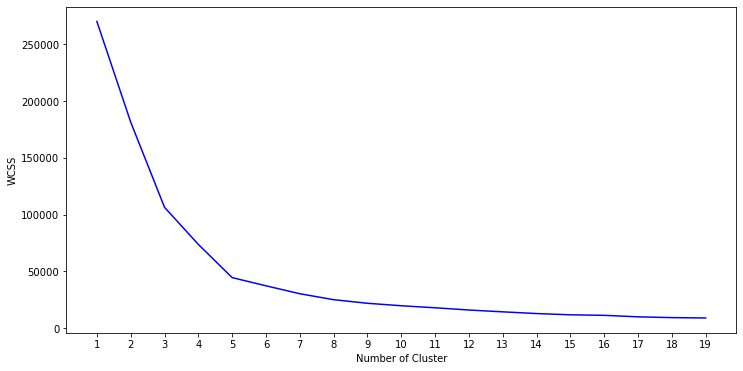

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 20), WCSS, c='blue')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 20, step=1))
plt.xlabel('Number of Cluster')
plt.show()

In [60]:
kmeans_fnl = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_fnl.fit_predict(H)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [67]:
# H[y_kmeans == 0, 0] is the same as H[y_kmeans == 0][:, 0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

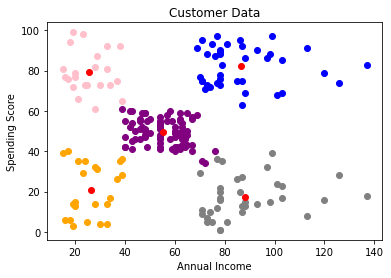

In [92]:
kmeans_fnl = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_fnl.fit_predict(H)
plt.figure(figsize=(6, 4))
plt.title('Customer Data')
plt.scatter(H[y_kmeans == 0][:, 0], H[y_kmeans == 0][:, 1], c='purple')
plt.scatter(H[y_kmeans == 1][:, 0], H[y_kmeans == 1][:, 1], c='gray')
plt.scatter(H[y_kmeans == 2][:, 0], H[y_kmeans == 2][:, 1], c='orange')
plt.scatter(H[y_kmeans == 3][:, 0], H[y_kmeans == 3][:, 1], c='pink')
plt.scatter(H[y_kmeans == 4][:, 0], H[y_kmeans == 4][:, 1], c='blue')
plt.scatter(kmeans_fnl.cluster_centers_[:, 0], kmeans_fnl.cluster_centers_[:, 1], c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

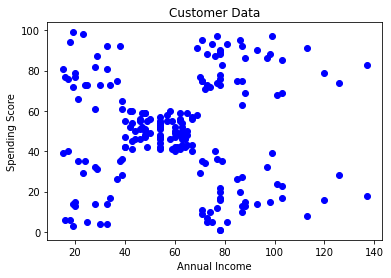

In [89]:
plt.figure(figsize=(6, 4))
plt.title('Customer Data')
plt.scatter(X['Annual_Income_(k$)'], X['Spending_Score'], c='blue')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()